In [1]:
import csv
import seaborn as sns
import pandas as pd
from math import log
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
## apt install cm-super dvipng
from matplotlib import rc
rc('text', usetex=True)

import matplotlib.patheffects as path_effects

In [44]:
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 22, 
      'axes.titlesize': 20, 
      'legend.fontsize': 'x-large',
      'font.family':'Arial', 'font.serif':['Arial'],
      'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)
sns.set_style('dark', rc=rc)

In [5]:
folder = '../rmats401/resultadosGY/'

In [6]:
def importEvents(file, lab):
    data = list(csv.reader(open(file), delimiter='\t'))
    idCol = data[0].index('ID')
    geneCol = data[0].index('GeneID')
    fdrCol = data[0].index('FDR')
    psi = data[0].index('IncLevelDifference')
    return list(zip(
        [x[idCol] for x in data[1:]], 
        [x[geneCol] for x in data[1:]], 
        [float(x[fdrCol]) for x in data[1:]],
        [float(x[psi]) for x in data[1:]],
        [lab for x in data[1:]]
    ))

In [7]:
a3ss = importEvents(folder + 'A3SS.MATS.JC.txt', 'A3SS')

In [8]:
a5ss = importEvents(folder + 'A5SS.MATS.JC.txt', 'A5SS')

In [9]:
ri = importEvents(folder + 'RI.MATS.JC.txt', 'RI')

In [10]:
se = importEvents(folder + 'SE.MATS.JC.txt', 'SE')

In [11]:
mxe = importEvents(folder + 'MXE.MATS.JC.txt', 'MXE')

In [12]:
all_events = a3ss + a5ss + ri + se + mxe

In [13]:
pd_data = pd.DataFrame(all_events, columns=['ID', 'Gene', 'FDR', 'PSI', 'Label'])

In [14]:
pd_data['qValue'] = pd_data.FDR.map(lambda e:  'ALL' if e > 0.05 else 'SIG')

In [15]:
pd_data['log10fdr'] = pd_data.FDR.map(lambda e: -log(e, 10))

In [53]:
def parseFolder(folder):
    a3ss = importEvents(folder + 'A3SS.MATS.JC.txt', 'A3SS')
    a5ss = importEvents(folder + 'A5SS.MATS.JC.txt', 'A5SS')
    ri = importEvents(folder + 'RI.MATS.JC.txt', 'RI')
    se = importEvents(folder + 'SE.MATS.JC.txt', 'SE')
    mxe = importEvents(folder + 'MXE.MATS.JC.txt', 'MXE')
    all_events = a3ss + a5ss + ri + se + mxe
    pd_data = pd.DataFrame(all_events, columns=['ID', 'Gene', 'FDR', 'PSI', 'Label'])
    pd_data['qValue'] = pd_data.FDR.map(lambda e:  'ALL' if e > 0.05 else 'SIG')
    pd_data['log10fdr'] = pd_data.FDR.map(lambda e: -log(e, 10))
    return pd_data

In [16]:
dt2 = pd_data.groupby(['Label', 'qValue']).FDR.agg([len]).reset_index()

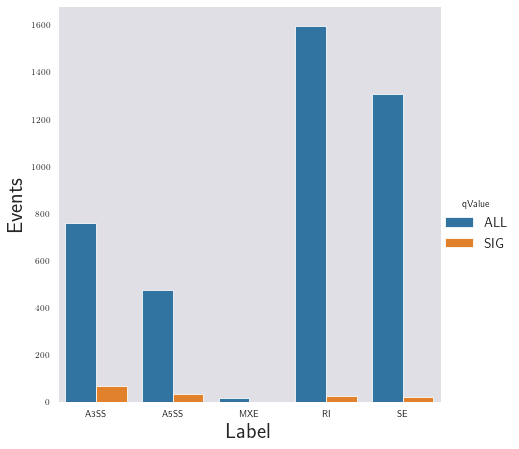

In [18]:
g = sns.catplot(x="Label", y="len", hue="qValue", data=dt2, height=6, kind="bar")
g.set_ylabels("Events")
plt.savefig('Ry.hist.png', dpi=150)

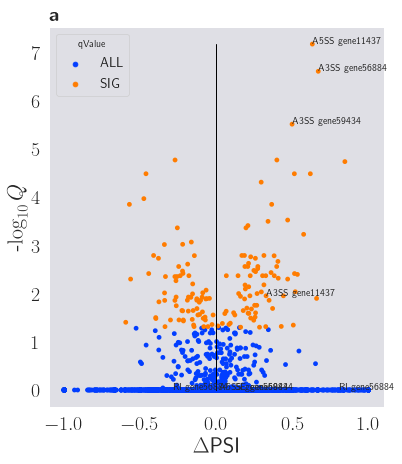

In [19]:
# plot size
ms = 4
plt.figure(figsize=(6,7))
sns.color_palette("bright")
ax = sns.scatterplot(x="PSI", y="log10fdr", hue="qValue", data=pd_data, linewidth=0, palette="bright")
ax.set_ylabel(r'-$\log_{10}{Q}$').set_path_effects([path_effects.Normal()])
ax.set_xlabel(r'$\Delta$PSI').set_path_effects([path_effects.Normal()])
plt.xticks([-1, -.5, 0, .5, 1], fontsize=20)
plt.yticks(fontsize=20)

x = np.linspace(0, pd_data["log10fdr"].max())
plt.plot([0 for x in x], x, 'k-', lw=1)


sigs = pd_data.loc[pd_data['Gene'].isin(list(pd_data.loc[pd_data['log10fdr'] > 5].Gene))]

for x in sigs.iterrows():
    ax.annotate("%s %s" % (x[1]['Label'], x[1]['Gene']), xy=(x[1]['PSI'], x[1]['log10fdr']), 
            ## xytext=(.5, 4), arrowprops=dict(facecolor='black', shrink=0.05)
           )


plt.title(r"\textbf{a}", loc='left')
plt.savefig('Ry.volcano.png', dpi=150)

In [51]:
def vulcano(
                plot_data,
                lab="a",
                tamanho=(6,7),
                paleta="bright",
                x_size=20, y_size=20,
                file='volcano_{lab}_.png',
                legenda='auto'
            ):
    ms = 4
    plt.figure(figsize=tamanho)
    sns.color_palette(paleta)
    ax = sns.scatterplot(x="PSI", y="log10fdr", hue="qValue", data=plot_data, linewidth=0, palette=paleta, legend=legenda)
    ax.set_ylabel(r'-$\log_{10}{Q}$').set_path_effects([path_effects.Normal()])
    ax.set_xlabel(r'$\Delta$PSI').set_path_effects([path_effects.Normal()])
    plt.xticks([-1, -.5, 0, .5, 1], fontsize=x_size)
    plt.yticks(fontsize=y_size)

    x = np.linspace(0, pd_data["log10fdr"].max())
    plt.plot([0 for x in x], x, 'k-', lw=1)


    sigs = plot_data.loc[plot_data['Gene'].isin(list(plot_data.loc[plot_data['log10fdr'] > 5].Gene))]

    for x in sigs.iterrows():
        ax.annotate("%s %s" % (x[1]['Label'], x[1]['Gene']), xy=(x[1]['PSI'], x[1]['log10fdr']), 
                ## xytext=(.5, 4), arrowprops=dict(facecolor='black', shrink=0.05)
               )
        
    plt.title(r"\textbf{%s}" % lab, loc='left')
    output = file.replace("{lab}", lab)
    print('Saved as', output)
    plt.savefig(output, dpi=150)
    return plt
    

Saved as volcano_RI_.png


<module 'matplotlib.pyplot' from '/home/mfernandes/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

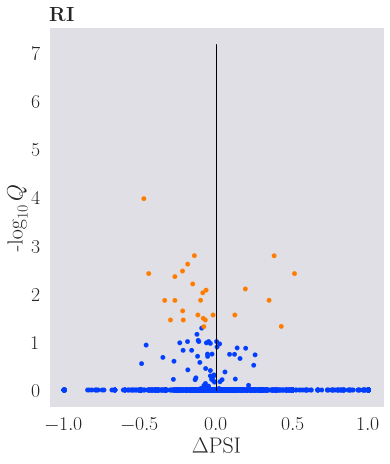

In [52]:
vulcano(pd_data.loc[pd_data.Label == "RI"],legenda=None, lab='RI')

In [50]:
for x in pd_data.loc[pd_data['Gene'].isin(list(pd_data.loc[pd_data['log10fdr'] > 5].Gene))].iterrows():
    print(x[1]['Gene'], x[1]['log10fdr'], x[1]['PSI'])

gene11437 1.9540622277179143 0.327
gene56884 6.6117085278525884 0.67
gene59434 5.514821203538592 0.498
gene11437 7.176226589494176 0.631
gene56884 -0.0 0.021
gene56884 -0.0 -0.285
gene56884 -0.0 0.809
gene59434 -0.0 0.12


In [25]:
plt.legend = NOne

,ID,Gene,FDR,PSI,Label,qValue,log10fdr
0,1,gene1519,1.000000,0.288,A3SS,ALL,-0.000000
1,2,gene45309,1.000000,0.095,A3SS,ALL,-0.000000
2,4,gene53615,1.000000,0.019,A3SS,ALL,-0.000000
3,5,gene32545,1.000000,-0.333,A3SS,ALL,-0.000000
4,9,gene42453,0.004256,0.304,A3SS,SIG,2.371004
...,...,...,...,...,...,...,...
4306,15,gene14025,1.000000,0.876,MXE,ALL,-0.000000
4307,17,gene36091,1.000000,-0.690,MXE,ALL,-0.000000
4308,18,gene694,1.000000,-0.358,MXE,ALL,-0.000000
4309,19,gene73977,1.000000,-0.013,MXE,ALL,-0.000000


In [56]:
gy = '../rmats401/resultadosGY/'

In [57]:
ry = '../rmats401/resultadosRY/'

In [58]:
gy_dt, ry_dt = parseFolder(gy_dt), parseFolder(ry_dt)

Saved as GY_RI_volcano.svg
Saved as GY_SE_volcano.svg
Saved as GY_A3SS_volcano.svg
Saved as GY_A5SS_volcano.svg
Saved as GY_MXE_volcano.svg
Saved as RY_RI_volcano.svg
Saved as RY_SE_volcano.svg
Saved as RY_A3SS_volcano.svg
Saved as RY_A5SS_volcano.svg
Saved as RY_MXE_volcano.svg


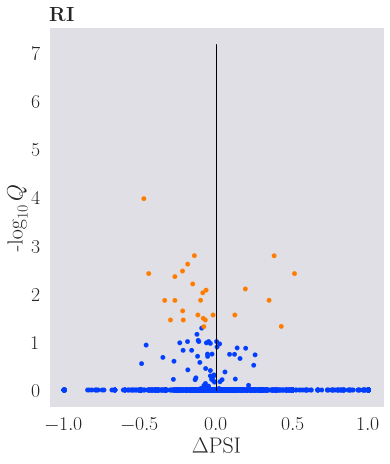

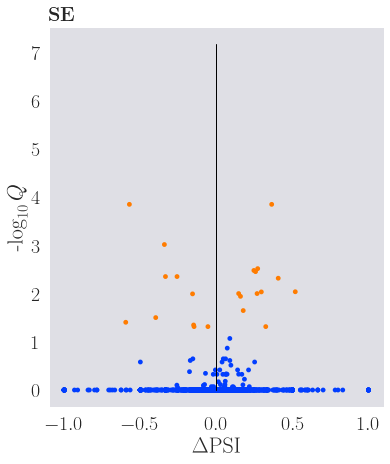

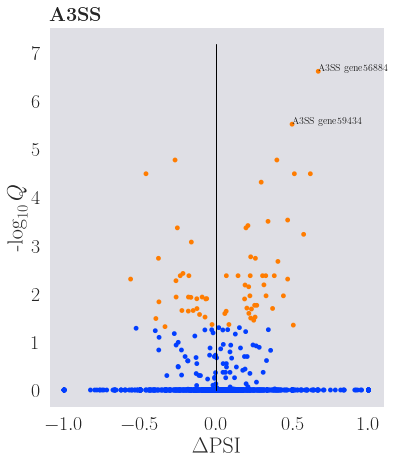

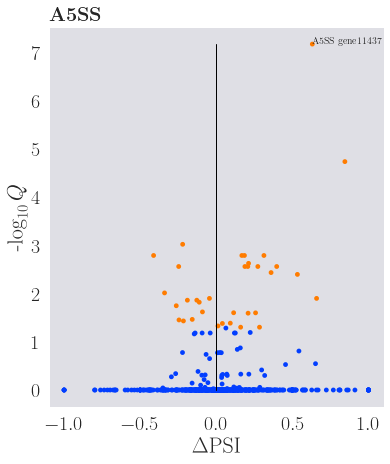

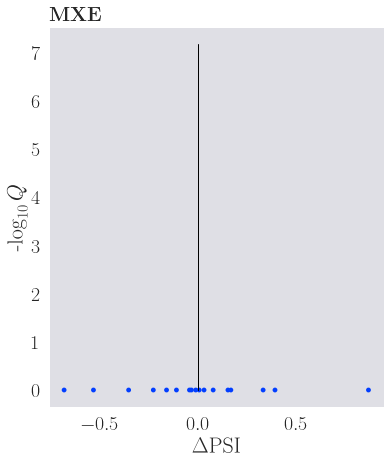

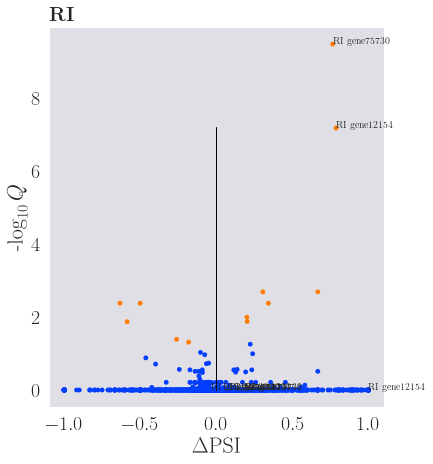

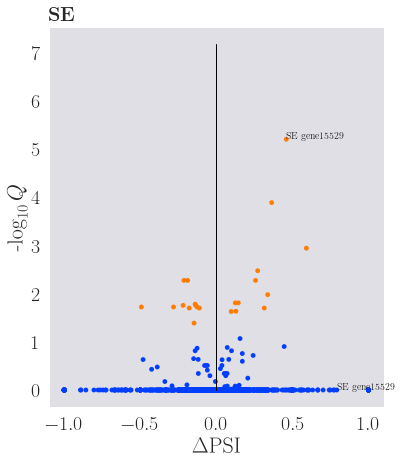

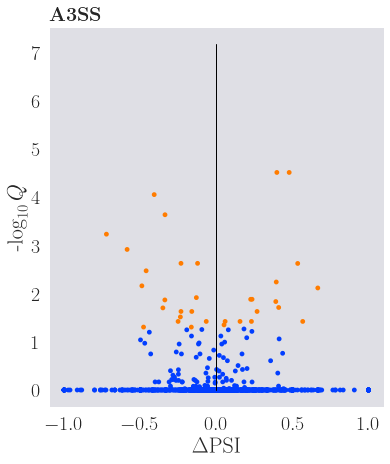

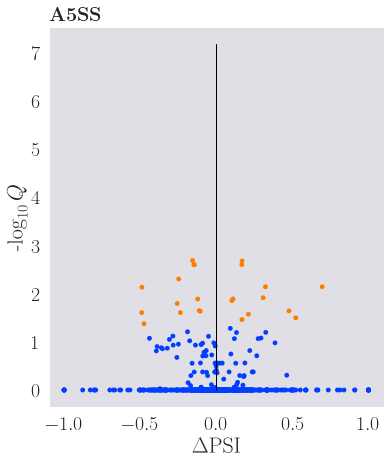

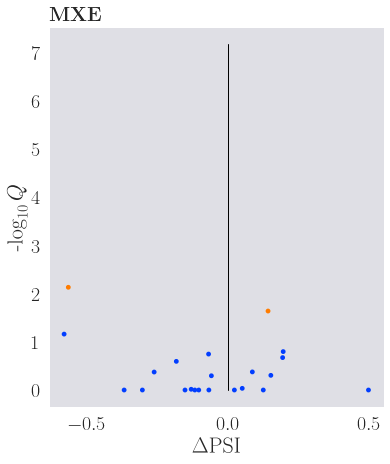

In [60]:
for cond, dt in [('GY', gy_dt), ('RY', ry_dt)]:
    for evt in ['RI', 'SE', 'A3SS', 'A5SS', 'MXE']:
        vulcano(dt.loc[dt.Label == evt],legenda=None, lab=evt, file=cond+"_{lab}_volcano.svg")

In [ ]:
vulcano(gy_dt.loc[gy_dt.Label == "SE"],legenda=None, lab='SE', file="GY_{lab}_volcano.svg")